In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #by using Axes3d we draw the 3d diagram

In [2]:
#generate and plot the data
N = 500
X = np.random.random((N, 2))*4 - 2 #in between (-2, 2)
Y = X[:,0]*X[:,1] #makes a saddle shape
# here Y be the target data
#Yhat is the predicted data

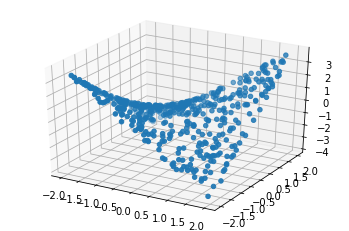

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [4]:
#make a neural network and train it
D = 2
M = 100 #number of hidden units/ hidden layers

#layer 1
W = np.random.randn(D, M) / np.sqrt(D)
b = np.zeros(M)

#layer 2
V = np.random.randn(M) / np.sqrt(M)
c = 0

In [5]:
#how to get the output
#consider the params  global
def forward(X):
    Z = X.dot(W) + b
    Z = Z * (Z > 0) #relu
    #Z = np.tanh(Z)
    Yhat = Z.dot(V) + c
    return Z, Yhat

In [6]:
#how to train the params
def derivative_V(Z, Y, Yhat):
    return (Y - Yhat).dot(Z)

def derivative_c(Y, Yhat):
    return (Y - Yhat).sum()

def derivative_W(X, Z, Y, Yhat, V):
    #dZ = np.outer(Y - Yhat, V) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(Y - Yhat, V) * (Z > 0) #relu
    return X.T.dot(dZ)

def derivative_b(Z, Y, Yhat, V):
    #dZ = np.outer(Y - Yhat, V) * ( 1 - Z * Z) #this is for tanh activation
    dZ = np.outer(Y -  Yhat, V) * (Z > 0) #this is relu activation
    return dZ.sum(axis=0)
def update(X, Z, Y, Yhat, W, b, V, c, learning_rate=1e-4):
    gV = derivative_V(Z, Y, Yhat)
    gc = derivative_c(Y, Yhat)
    gW = derivative_W(X, Z, Y, Yhat, V)
    gb = derivative_b(Z, Y, Yhat, V)
    
    
    V += learning_rate*gV
    c += learning_rate*gc
    W += learning_rate*gW
    b += learning_rate*gb
    
    return W, b, V, c

In [7]:
#so we can plot the costs later
def get_cost(Y, Yhat):
    return ((Y - Yhat)**2).mean()

In [9]:
# run a training loop
#plot the costs
#and plot the final result

costs = []
for i in range(200):
    Z, Yhat = forward(X)
    W, b, V, c = update(X, Z, Y, Yhat, W, b, V, c)
    cost = get_cost(Y, Yhat)
    costs.append(cost)
    if i % 25 == 0:
        print(costs)
        

[0.0809207849864413]
[0.0809207849864413, 0.08089533232205835, 0.0808701076748748, 0.08084497352940816, 0.08081994051757507, 0.08079509264156519, 0.0807705772529608, 0.08074615727969284, 0.08072179642384611, 0.0806973379885453, 0.08067287232947838, 0.08064850238045615, 0.08062422744681552, 0.0806000178041234, 0.0805758460178726, 0.08055176724361245, 0.0805277776768622, 0.08050387226806265, 0.08048008050875055, 0.08045640191722393, 0.08043295263105443, 0.08040959157088233, 0.08038631751171331, 0.08036313129575455, 0.08034003075614143, 0.08031707153231926]
[0.0809207849864413, 0.08089533232205835, 0.0808701076748748, 0.08084497352940816, 0.08081994051757507, 0.08079509264156519, 0.0807705772529608, 0.08074615727969284, 0.08072179642384611, 0.0806973379885453, 0.08067287232947838, 0.08064850238045615, 0.08062422744681552, 0.0806000178041234, 0.0805758460178726, 0.08055176724361245, 0.0805277776768622, 0.08050387226806265, 0.08048008050875055, 0.08045640191722393, 0.08043295263105443, 0.08

[0.0809207849864413, 0.08089533232205835, 0.0808701076748748, 0.08084497352940816, 0.08081994051757507, 0.08079509264156519, 0.0807705772529608, 0.08074615727969284, 0.08072179642384611, 0.0806973379885453, 0.08067287232947838, 0.08064850238045615, 0.08062422744681552, 0.0806000178041234, 0.0805758460178726, 0.08055176724361245, 0.0805277776768622, 0.08050387226806265, 0.08048008050875055, 0.08045640191722393, 0.08043295263105443, 0.08040959157088233, 0.08038631751171331, 0.08036313129575455, 0.08034003075614143, 0.08031707153231926, 0.08029425445498915, 0.08027149257083613, 0.08024872882336041, 0.08022604792728812, 0.08020369859633436, 0.08018164664598071, 0.08015967469512192, 0.0801377822123085, 0.08011596868495466, 0.08009428096124827, 0.08007285157544802, 0.08005144713978941, 0.08002997912076282, 0.08000857662791687, 0.07998717049816392, 0.07996583981621873, 0.0799445851312356, 0.0799233774195528, 0.07990218872212318, 0.07988138559440448, 0.07986063875320633, 0.07983988906672186, 0

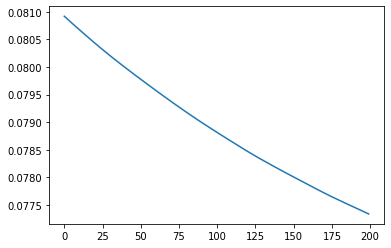

In [10]:
#plot the costs
plt.plot(costs)
plt.show()

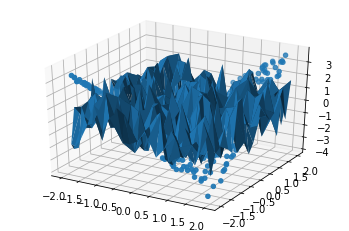

In [13]:
#plot the prediction with the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)


#surface plot
line =np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
_, yhat = forward(Xgrid)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

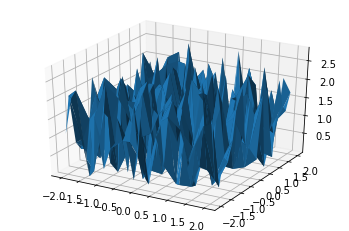

In [19]:
#plot magnitude of the residuals

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], R, linewidth=0.2, antialiased=True)
plt.show()